# Heart Health Using Machine Learning 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [4]:
dataset = pd.read_csv("data (2).csv")
dataset.head(5)

,Systolic Blood pressure,Diastolic Blood pressure,Age,Gender,Height,Weight,High low-density lipoprotein (LDL) cholesterol,Low-density lipoprotein (LDL) cholesterol,Blood Glucose level,Active smoking,Passive smoking,Obesity,Diet,Physical activity,Result
0,120,80,30,1,140,40,5,5,30,1,1,15,1,1,3
1,110,60,35,0,150,43,8,8,40,0,1,16,0,1,4
2,115,65,40,1,160,50,10,10,50,1,0,17,1,0,3
3,100,70,45,0,170,55,15,15,60,0,0,18,0,0,4
4,105,75,50,1,180,60,20,20,70,1,0,19,1,0,2


In [5]:
dataset.shape

(200, 15)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Systolic Blood pressure                          200 non-null    int64
 1   Diastolic Blood pressure                         200 non-null    int64
 2   Age                                              200 non-null    int64
 3   Gender                                           200 non-null    int64
 4   Height                                           200 non-null    int64
 5   Weight                                           200 non-null    int64
 6   High low-density lipoprotein (LDL) cholesterol   200 non-null    int64
 7   Low-density lipoprotein (LDL) cholesterol        200 non-null    int64
 8   Blood Glucose level                              200 non-null    int64
 9   Active smoking                                   200 n

In [7]:
dataset.describe()

,Systolic Blood pressure,Diastolic Blood pressure,Age,Gender,Height,Weight,High low-density lipoprotein (LDL) cholesterol,Low-density lipoprotein (LDL) cholesterol,Blood Glucose level,Active smoking,Passive smoking,Obesity,Diet,Physical activity,Result
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,120.000000,71.85000,64.750000,0.550000,163.550000,82.400000,47.900000,68.650000,152.65000,0.550000,0.550000,28.350000,0.550000,0.550000,1.750000
std,16.331983,20.57533,17.896618,0.498742,12.706486,26.986689,28.289423,59.808131,73.24309,0.498742,0.498742,8.838444,0.498742,0.498742,1.413325
min,90.000000,40.00000,30.000000,0.000000,140.000000,40.000000,5.000000,5.000000,30.00000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000
25%,108.750000,53.75000,53.750000,0.000000,153.750000,63.750000,23.750000,23.750000,85.00000,0.000000,0.000000,19.750000,0.000000,0.000000,0.750000
50%,120.000000,76.50000,67.500000,1.000000,166.500000,79.500000,47.500000,47.500000,170.00000,1.000000,1.000000,31.000000,1.000000,1.000000,1.500000
75%,131.250000,82.75000,80.000000,1.000000,174.250000,96.250000,71.250000,92.500000,220.50000,1.000000,1.000000,36.250000,1.000000,1.000000,3.000000
max,150.000000,110.00000,90.000000,1.000000,180.000000,140.000000,95.000000,195.000000,240.00000,1.000000,1.000000,40.000000,1.000000,1.000000,4.000000


In [8]:
print(dataset.corr()["Result"])

Systolic Blood pressure                           -0.417991
Diastolic Blood pressure                           0.060914
Age                                               -0.509094
Gender                                            -0.160403
Height                                            -0.607910
Weight                                            -0.735173
High low-density lipoprotein (LDL) cholesterol    -0.728340
Low-density lipoprotein (LDL) cholesterol         -0.681137
Blood Glucose level                               -0.684839
Active smoking                                    -0.160403
Passive smoking                                   -0.089113
Obesity                                           -0.648677
Diet                                              -0.160403
Physical activity                                 -0.089113
Result                                             1.000000
Name: Result, dtype: float64


[[<AxesSubplot:title={'center':'Systolic Blood pressure'}>
  <AxesSubplot:title={'center':'Diastolic Blood pressure'}>
  <AxesSubplot:title={'center':'Age'}>
  <AxesSubplot:title={'center':'Gender'}>]
 [<AxesSubplot:title={'center':'Height'}>
  <AxesSubplot:title={'center':'Weight'}>
  <AxesSubplot:title={'center':'High low-density lipoprotein (LDL) cholesterol '}>
  <AxesSubplot:title={'center':'Low-density lipoprotein (LDL) cholesterol'}>]
 [<AxesSubplot:title={'center':'Blood Glucose level'}>
  <AxesSubplot:title={'center':'Active smoking'}>
  <AxesSubplot:title={'center':'Passive smoking'}>
  <AxesSubplot:title={'center':'Obesity'}>]
 [<AxesSubplot:title={'center':'Diet'}>
  <AxesSubplot:title={'center':'Physical activity'}>
  <AxesSubplot:title={'center':'Result'}> <AxesSubplot:>]]


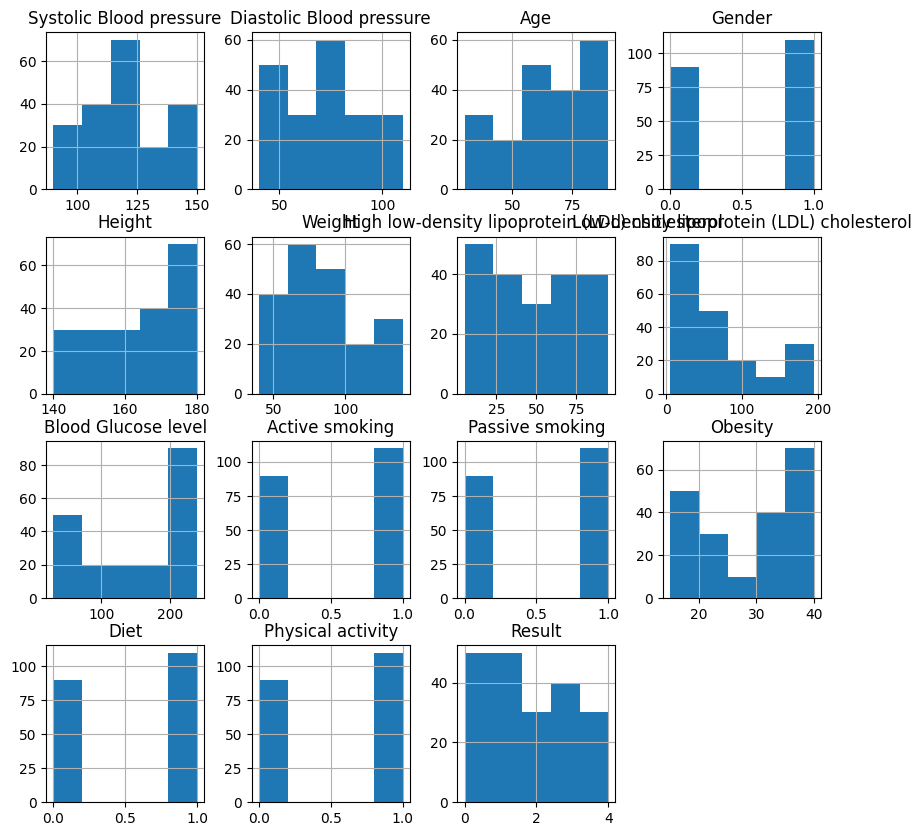

In [9]:
a1=dataset.hist(bins=5,figsize=(10,10))
print(a1)

<AxesSubplot:xlabel='Result', ylabel='count'>

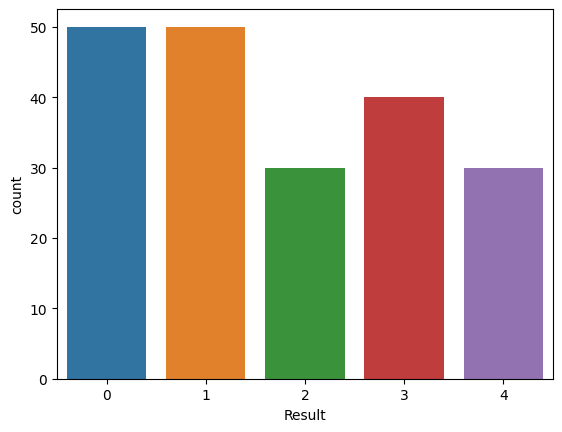

In [10]:
y = dataset["Result"]
sns.countplot(y)

#### Gender Feature

<AxesSubplot:xlabel='Gender', ylabel='Result'>

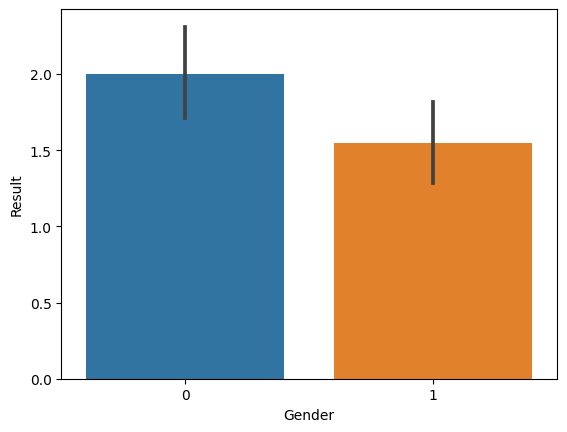

In [11]:
dataset["Gender"].unique()
sns.barplot(dataset["Gender"],y)

### Blood Glucose level 

<AxesSubplot:xlabel='Blood Glucose level', ylabel='Result'>

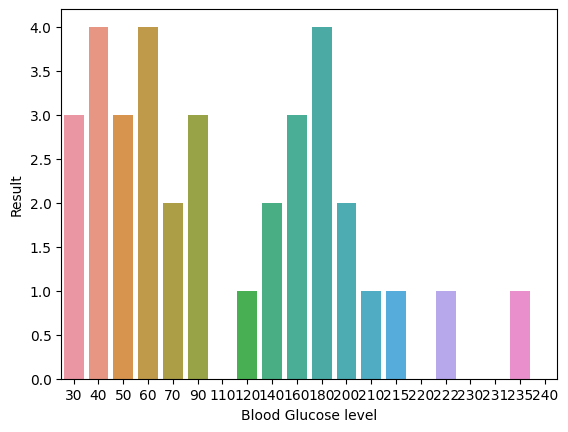

In [12]:
dataset["Blood Glucose level"].unique()
sns.barplot(dataset["Blood Glucose level"],y)

In [13]:
x=dataset.drop("Result",axis=1)
y=dataset["Result"]

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 14)
(40, 14)
(160,)
(40,)


### Logistic Regression

In [15]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train,Y_train)

C:\Users\91984\anaconda3\envs\pythonclasses\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=500)

In [16]:
Y_pred_lr = lr.predict(X_test)

In [19]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 100.0 %


In [17]:
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)

In [18]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 100.0 %


In [20]:
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)

In [21]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 62.5 %


In [22]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [23]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


In [24]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [26]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")


The accuracy score achieved using Decision Tree is: 100.0 %


In [27]:
xgb_model = xgb.XGBClassifier(max_depth=7,objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)
Y_pred_xgb = xgb_model.predict(X_test)

In [28]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 100.0 %


In [29]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

print (X_train.shape, Y_train.shape)
print (X_train.shape, Y_test.shape)

(160, 14) (160,)
(160, 14) (40,)


In [35]:
s= [score_lr,score_nb,score_svm,score_dt,score_rf,score_xgb]
a= ["Logistic Regression","Naive Bayes","SVM","Decision Tree","Random Forest","XGBoost","Keras Neural Network"]    

for i in range(len(a)):
    print("Accuracy score of "+a[i]+" is: "+str(s[i])+" %")


Accuracy score of Logistic Regression is: 100.0 %
Accuracy score of Naive Bayes is: 62.5 %
Accuracy score of SVM is: 100.0 %
Accuracy score of Decision Tree is: 100.0 %
Accuracy score of Random Forest is: 100.0 %
Accuracy score of XGBoost is: 100.0 %


IndexError: list index out of range